# Analizy danych za pomocą biblioteki *revoscalepy* z wykorzystaniem wewnętrznego kontekstu serwera SQL 

https://docs.microsoft.com/pl-pl/r-server/python-reference/revoscalepy/rxinsqlserver

### Informacje o środowisku wykonawczym

- Stosowana metoda: **SQL Server Machine Learning Services (In-Database)**

In [1]:
import sys
import revoscalepy


Express Edition will continue to be enforced.


In [2]:
print('Wersja modułu revoscalepy: ', revoscalepy.__version__)
print('Ścieżka do biblioteki revoscalepy:  ', revoscalepy.__path__)
print('Wersja języka Python: ', sys.version)
print('Ścieżka do interpretera: ', sys.executable)

Wersja modułu revoscalepy:  9.2.0
Ścieżka do biblioteki revoscalepy:   ['D:\\Microsoft SQL Server\\MSSQL14.MSSQLSERVER\\PYTHON_SERVICES\\lib\\site-packages\\revoscalepy']
Wersja języka Python:  3.5.2 |Continuum Analytics, Inc.| (default, Jul  5 2016, 11:41:13) [MSC v.1900 64 bit (AMD64)]
Ścieżka do interpretera:  D:\Microsoft SQL Server\MSSQL14.MSSQLSERVER\PYTHON_SERVICES\python.exe


### Chwila na ustawienia

In [3]:
del revoscalepy #małe czyszczenie

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

### Utworzenie kontekstu obliczeniowego wewnątrz serwera MS SQL 2017
- RxInSqlServer - klasa tworząca kontekst obliczeniowy na serwerze SQL
- RxSqlServerData - klasa realizująca dostęp do zbioru danych określonych przez zapytanie i zlokalizowanych na serwerze SQL

### Utworzenie kontekstu obliczeniowego - rozwiązanie

In [5]:
from revoscalepy import RxSqlServerData, RxInSqlServer, rx_lin_mod

In [6]:
connection_string="Driver=SQL Server;Server=.;Database=RevoTestDB;Trusted_Connection=True"

In [7]:
cc = RxInSqlServer(
    connection_string = connection_string,
    num_tasks = 1,
    auto_cleanup = False,
    console_output = True,
    execution_timeout_seconds = 0,
    wait = True
    )

In [8]:
type(cc)

revoscalepy.computecontext.RxInSqlServer.RxInSqlServer

### Analizowane dane

Pochodzenie:
http://stat-computing.org/dataexpo/2009/the-data.html <br>
Wiecej danych testowych jest dostępnych po instalacji narzędzi dla języka R, w lokalizacji dla przykładu: <br>**"D:\Microsoft SQL Server\MSSQL14.MSSQLSERVER\R_SERVICES\library\RevoScaleR\SampleData"** 

#### Opis pól występujących w tabeli
- **ArrDelay** - opóźnienie przylotu w minutach
- **CRSDepTime** - planowany czas wylotu (czas lokalny, hhmm)
- **DayOfWeek** - dzień 1 (Monday) - 7 (Sunday)

**query="select top 600000 [ArrDelay],[CRSDepTime],[DayOfWeek] FROM airlinedemosmall"**

In [9]:
data_source = RxSqlServerData(
    sql_query = "select top 600000 * from airlinedemosmall",
    connection_string = connection_string,
    column_info = {
        "ArrDelay" : { "type" : "integer" },
        "DayOfWeek" : {
            "type" : "factor",
            "levels" : [ "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday" ]
        }
    })

In [10]:
type(data_source)

revoscalepy.datasource.RxSqlData.RxSqlServerData

### Pobranie danych z bazy

In [11]:
data_source.head(num_rows = 6, report_progress = 3)

ReadNum=1, StartRowNum=1, CurrentNumRows=6, TotalRowsProcessed=6, ReadTime=0.054, ProcessDataTime = 0.149, LoopTime = 0.203 

Overall compute summaries time: 0.203 secs.
Total loop time: 0.203
Total read time for 1 reads: 0.054
Total process data time: 0.149
Average read time per read: 0.054
Average process data time per read: 0.149
Number of threads used: 2


,ArrDelay,CRSDepTime,DayOfWeek
0,6,9.666666,Monday
1,-8,19.916666,Monday
2,-2,13.750000,Monday
3,1,11.750000,Monday
4,-2,6.416667,Monday
5,-14,13.833333,Monday


### Pobranie podstawowych informacji o obiekcie *revoscalepy data source*

In [12]:
from revoscalepy import rx_get_info, rx_get_var_info, \
                        rx_get_var_names, rx_summary, \
                        rx_list_keys, rx_read_object, \
                        rx_get_compute_context, rx_set_compute_context

### Ustawienie kontekstu lokalnego

In [13]:
from revoscalepy import RxLocalSeq

In [ ]:
local_cc = RxLocalSeq()

In [ ]:
print(rx_get_compute_context())

### Ustawienie kontekstu na serwerze SQL

In [ ]:
#sql_cc = rx_set_compute_context(cc)
#print(rx_get_compute_context())

In [14]:
info = rx_get_info(data_source)
print(info)

Connection string:Driver=SQL Server;Server=.;Database=RevoTestDB;Trusted_Connection=True
Data Source:SqlServer



In [15]:
var_info = rx_get_var_info(data_source, compute_info=True)
print(var_info)

Var 1: ArrDelay, Type: integer, Storage: int32, Low/High: (-86.0000, 1490.0000)
Var 2: CRSDepTime, Type: numeric, Storage: float64, Low/High: (0.0167, 23.9833)
Var 3: DayOfWeek
	7 factor levels: ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']



In [16]:
#rx_set_compute_context(local_cc)
name_info = rx_get_var_names(data_source)
print(name_info)


ArrDelay CRSDepTime DayOfWeek


In [17]:
info = rx_get_info(data_source, get_var_info=True)
print(info)

Connection string:Driver=SQL Server;Server=.;Database=RevoTestDB;Trusted_Connection=True
Data Source:SqlServer
Number of variables:3.0
Variable information: 
Var 1: ArrDelay, Type: integer, Storage: int32
Var 2: CRSDepTime, Type: numeric, Storage: float64
Var 3: DayOfWeek
	7 factor levels: ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']



In [18]:
summary = rx_summary("ArrDelay+DayOfWeek", data_source)
print(summary)

Rows Read: 600000, Total Rows Processed: 600000, Total Chunk Time: 1.929 seconds 
Computation time: 2.306 seconds.
Call:
rx_summary(formula = 'ArrDelay+DayOfWeek', data = <revoscalepy.datasource.RxSqlData.RxSqlServerData object at
    0x0000026FF0432438>, by_group_out_file = None, summary_stats = ['Mean', 'StdDev', 'Min', 'Max', 'ValidObs',
    'MissingObs'], by_term = True, pweights = None, fweights = None, row_selection = None, transforms = None,
    transform_objects = None, transform_function = None, transform_variables = None, transform_packages = None,
    transform_environment = None, overwrite = False, use_sparse_cube = False, remove_zero_counts = False,
    blocks_per_read = 1, rows_per_block = 100000, report_progress = None, verbose = 0, compute_context =
    <revoscalepy.computecontext.RxLocalSeq.RxLocalSeq object at 0x0000026FEE58A160>)

Summary Statistics Results for: ArrDelay+DayOfWeek

Number of valid observations: 600000.0

       Name       Mean     StdDev   Min     Ma

In [19]:
keys = rx_list_keys(data_source)
print(type(keys))
print(len(keys))

Rows Read: 600000, Total Rows Processed: 600000, Total Chunk Time: 1.354 seconds 
<class 'pandas.core.frame.DataFrame'>
600000


In [56]:
print(keys['DayOfWeek'][:10], keys['ArrDelay'][:10])

0    Monday
1    Monday
2    Monday
3    Monday
4    Monday
5    Monday
6    Monday
7    Monday
8    Monday
9    Monday
Name: DayOfWeek, dtype: object 0     6
1    -8
2    -2
3     1
4    -2
5   -14
6    20
7    -2
8    -2
9   -15
Name: ArrDelay, dtype: int32


### Dane z obiektu *data_source* można zaimportować do obiektu *DataFrame* z biblioteki *Pandas* 

In [27]:
from revoscalepy import rx_import

In [28]:
df = pd.DataFrame(rx_import(input_data = data_source))

Rows Read: 600000, Total Rows Processed: 600000, Total Chunk Time: 1.363 seconds 


In [29]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [30]:
df.sample(n=5)

,ArrDelay,CRSDepTime,DayOfWeek
141996,8,19.499998,Tuesday
30763,1,10.666666,Wednesday
328555,-15,6.250000,Thursday
402546,-18,6.333333,Thursday
300737,19,11.416667,Monday


In [58]:
df.sort_values(by='ArrDelay', ascending=False)[:10]

,ArrDelay,CRSDepTime,DayOfWeek,delayed
434129,1490,6.250000,Friday,True
505852,1370,11.583334,Saturday,True
226738,1267,13.083334,Saturday,True
412481,1224,10.799999,Friday,True
420041,1202,22.333334,Sunday,True
401146,1195,10.416667,Friday,True
420103,1189,7.083333,Sunday,True
506928,1182,13.750000,Friday,True
421875,1166,14.166667,Wednesday,True
486052,1143,15.000000,Tuesday,True


In [32]:
df.pivot_table(columns='DayOfWeek')

DayOfWeek,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
ArrDelay,-5.867632e+07,-1.026150e+08,-5.687598e+07,-5.702569e+07,-7.362105e+07,-5.752610e+07,-3.572544e+07
CRSDepTime,1.345261e+01,1.345228e+01,1.347639e+01,1.349100e+01,1.350271e+01,1.315288e+01,1.381579e+01


Wynik w każdym z wierszy reprezentuje wartość średnią dla poszczególnego dnia tygodnia

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026FF99B8940>]], dtype=object)

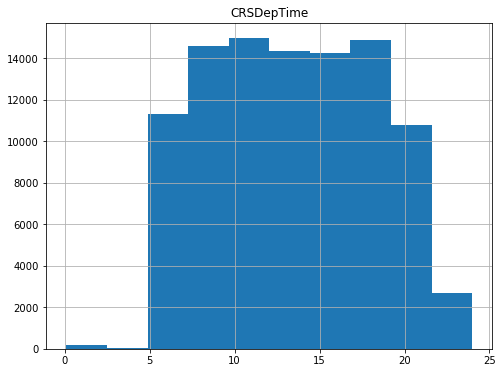

In [62]:
df.groupby('DayOfWeek').get_group('Monday').hist(column='CRSDepTime', figsize=[8,6])

In [34]:
df['delayed'] = df['ArrDelay'].apply(lambda x: x > 0)

In [35]:
df.sample(n=5)

,ArrDelay,CRSDepTime,DayOfWeek,delayed
86215,29,12.666666,Sunday,True
339392,94,10.333333,Sunday,True
223421,-18,8.583334,Sunday,False
199087,9,13.416667,Monday,True
483386,-1,10.083334,Friday,False


In [36]:
df['delayed'].value_counts()

False    312462
True     287538
Name: delayed, dtype: int64

In [37]:
not_delayed = df['delayed'].value_counts()[0]
print('Ilość lotów bez opóźnienia:', not_delayed)

Ilość lotów bez opóźnienia: 312462


In [38]:
delayed = df['delayed'].value_counts()[1]
print('Ilość lotów opóźnionych:', delayed)

Ilość lotów opóźnionych: 287538


In [39]:
total_flights=not_delayed+delayed
print('Małe sprawdzenie:', total_flights)

Małe sprawdzenie: 600000


In [40]:
print('Współczynnik samolotów przylatujących na czas:', float(not_delayed) / total_flights)

Współczynnik samolotów przylatujących na czas: 0.52077


In [41]:
group_by_dayOfWeek = df.groupby(['DayOfWeek','delayed'])
print(group_by_dayOfWeek)
print(group_by_dayOfWeek.size())

DayOfWeek  delayed
Monday     False      48944
           True       49031
Tuesday    False      43431
           True       34294
Wednesday  False      43313
           True       35562
Thursday   False      44194
           True       37110
Friday     False      38381
           True       44606
Saturday   False      45919
           True       40240
Sunday     False      48280
           True       46695
dtype: int64


In [42]:
delays_by_dayOfWeek = group_by_dayOfWeek.size().unstack()
delays_by_dayOfWeek

delayed,False,True
DayOfWeek,,
Monday,48944,49031
Tuesday,43431,34294
Wednesday,43313,35562
Thursday,44194,37110
Friday,38381,44606
Saturday,45919,40240
Sunday,48280,46695


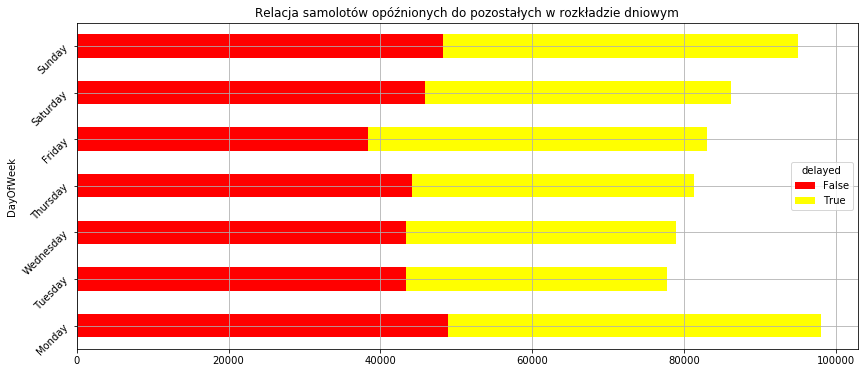

In [43]:
delays_by_dayOfWeek.plot(kind = 'barh', 
                               stacked = True, 
                               figsize=[14,6], 
                               colormap='autumn',
                               grid = True,
                               rot = 45,
                               title='Relacja samolotów opóźnionych do pozostałych w rozkładzie dniowym')

[Więcej ustwień wykresów](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html)

In [44]:
delays_by_dayOfWeek['flights_count']= (delays_by_dayOfWeek[False]+delays_by_dayOfWeek[True])
delays_by_dayOfWeek[:5]

delayed,False,True,flights_count
DayOfWeek,,,
Monday,48944,49031,97975
Tuesday,43431,34294,77725
Wednesday,43313,35562,78875
Thursday,44194,37110,81304
Friday,38381,44606,82987


In [49]:
delays_by_dayOfWeek['proportion_delayed'] = delays_by_dayOfWeek[True] / delays_by_dayOfWeek['flights_count']
delays_by_dayOfWeek[:4]

delayed,False,True,flights_count,proportion_delayed
DayOfWeek,,,,
Monday,48944,49031,97975,0.500444
Tuesday,43431,34294,77725,0.441222
Wednesday,43313,35562,78875,0.450865
Thursday,44194,37110,81304,0.456435


In [50]:
delays_by_dayOfWeek.sort_values('proportion_delayed', ascending=False)

delayed,False,True,flights_count,proportion_delayed
DayOfWeek,,,,
Friday,38381,44606,82987,0.537506
Monday,48944,49031,97975,0.500444
Sunday,48280,46695,94975,0.491656
Saturday,45919,40240,86159,0.467043
Thursday,44194,37110,81304,0.456435
Wednesday,43313,35562,78875,0.450865
Tuesday,43431,34294,77725,0.441222


In [51]:
monday = df[df['DayOfWeek'] == 'Monday']['ArrDelay']

In [52]:
monday.describe()

count    9.797500e+04
mean    -5.867632e+07
std      3.500926e+08
min     -2.147484e+09
25%     -9.000000e+00
50%      1.000000e+00
75%      1.700000e+01
max      1.017000e+03
Name: ArrDelay, dtype: float64

In [53]:
import numpy as np
bin_values = np.arange(start=-50, stop=200, step=10)
print(bin_values)

[-50 -40 -30 -20 -10   0  10  20  30  40  50  60  70  80  90 100 110 120
 130 140 150 160 170 180 190]


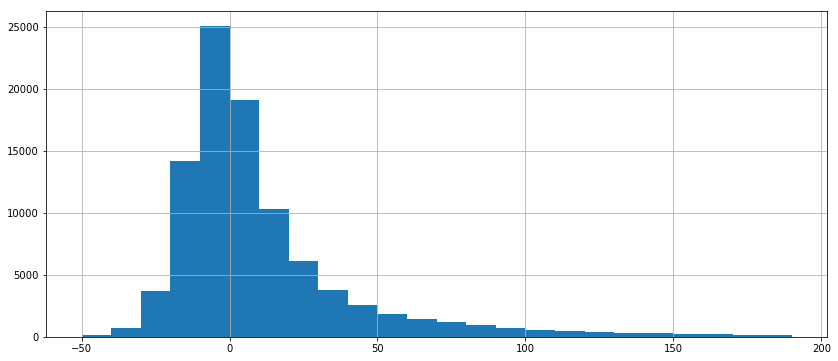

In [54]:
monday.hist(bins=bin_values, figsize=[14,6])

In [64]:
from revoscalepy import rx_lin_mod

In [65]:
formula = "ArrDelay ~ DayOfWeek"

revoscalepy.rx_lin_mod(formula, data, pweights=None, fweights=None, cube: bool = False, 
                       cube_predictions: bool = False, row_selection: str = None, 
                       transforms: dict = None, transform_objects: dict = None, 
                       transform_function: typing.Union[str, <built-in function callable>] = None, 
                       transform_variables: list = None, transform_packages: list = None, 
                       transform_environment=None, drop_first: bool = False, 
                       drop_main: bool = True, cov_coef: bool = False, cov_data: bool = False, 
                       blocks_per_read: int = 1, report_progress: int = None, verbose: int = 0, 
                       compute_context=None, **kwargs)
Description
Fit linear models on small or large data.


In [66]:
lin_mod = rx_lin_mod(formula, data = data_source, compute_context = cc,cube=True)

In [67]:
print(lin_mod)

Call:
rx_lin_mod(formula = 'ArrDelay ~ DayOfWeek', data = <revoscalepy.datasource.RxSqlData.RxSqlServerData object at
    0x0000026FF0432438>, pweights = None, fweights = None, cube = True, cube_predictions = False, row_selection = None,
    transforms = None, transform_objects = None, transform_function = None, transform_variables = None,
    transform_packages = None, transform_environment = None, drop_first = False, drop_main = True, cov_coef = False,
    cov_data = False, blocks_per_read = 1, report_progress = None, verbose = 0, compute_context = <class
    'revoscalepy.computecontext.RxInSqlServer.RxInSqlServer'>)

Cube Linear regression Results for: ArrDelay ~ DayOfWeek

Dependent variable(s): ['ArrDelay']
Total independent variables: 7
Number of valid observations: 582628
Number of missing observations: 17372
                            coefficients   ArrDelay
DayOfWeek=Monday        DayOfWeek=Monday  12.025604
DayOfWeek=Tuesday      DayOfWeek=Tuesday  11.293808
DayOfWeek=Wednes

In [68]:
print(lin_mod.summary())

Call:
rx_lin_mod(formula = 'ArrDelay ~ DayOfWeek', data = <revoscalepy.datasource.RxSqlData.RxSqlServerData object at
    0x0000026FF0432438>, pweights = None, fweights = None, cube = True, cube_predictions = False, row_selection = None,
    transforms = None, transform_objects = None, transform_function = None, transform_variables = None,
    transform_packages = None, transform_environment = None, drop_first = False, drop_main = True, cov_coef = False,
    cov_data = False, blocks_per_read = 1, report_progress = None, verbose = 0, compute_context = <class
    'revoscalepy.computecontext.RxInSqlServer.RxInSqlServer'>)

Cube Linear regression Results for: ArrDelay ~ DayOfWeek

Dependent variable(s): ['ArrDelay']
Total independent variables: 7
Number of valid observations: 582628
Number of missing observations: 17372
                            coefficients   ArrDelay
DayOfWeek=Monday        DayOfWeek=Monday  12.025604
DayOfWeek=Tuesday      DayOfWeek=Tuesday  11.293808
DayOfWeek=Wednes